# Tidal Heating and Torque versus Strength (Viscosity and Shear Modulus)
An example of using TidalPy as Object Oriented Programming


In [1]:
# Setup Jupyter environment and load in useful packages 
%matplotlib inline 

In [2]:
import TidalPy
from TidalPy.orbit import Orbit
from TidalPy.planets import build_burnman_world
import numpy as np

Warning from file 'C:\ProgramData\Anaconda3\lib\site-packages\burnman\mineral.py', line 195:
You are trying to calculate shear modulus for Fe_Dewaele when it is exactly zero. 
If Fe_Dewaele is a liquid, then you can safely ignore this warning, but consider 
calculating bulk modulus or bulk sound rather than Vp or Vs. 
If Fe_Dewaele is not a liquid, then shear modulus calculations for the 
underlying equation of state (Vinet) have not been implemented, 
and Vp and Vs estimates will be incorrect.



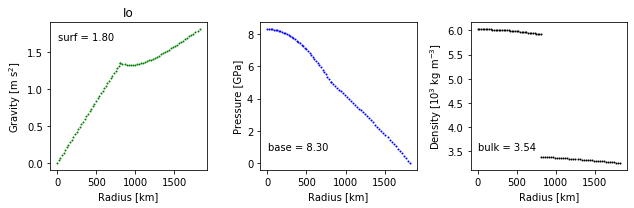

In [3]:
# Build the planet, let's choose Jupiter's moon Io
io = build_burnman_world('Io')
io.paint()

jupiter = build_burnman_world('Jupiter')
sol = build_burnman_world('Sol')

In [4]:
# Change Io's orbital parameters if necessary
orbit = Orbit(sol, jupiter, io)

print("Io's orbital parameters:")
print(f"\te = {io.eccentricity}")
print(f"\tP = {orbit.rads2days(io.orbital_freq)} [days]")

Io's orbital parameters:
	e = [4.100e-03]
	P = [1.769e+00] [days]


In [5]:
# Let's make a helper function to quickly plot our findings
import matplotlib.pyplot as plt
def contour_plot(heating, rheology_name):
    fig, ax = plt.subplots()
    cpoints = [10, 11, 12, 13, 14, 15, 16]
    cinfo = ax.contourf(visco, shear, np.log10(heating), cpoints)
    ax.contour(visco, shear, np.log10(heating), cpoints, colors=('k',), linewidths=(0.5,))
    cbar = plt.colorbar(cinfo, ax=ax)
    cbar.ax.set_ylabel('Tidal Heating [W]')
    ax.set_ylabel('Shear Modulus [Pa]')
    ax.set_xlabel('Effective Viscosity [Pa s]')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f'{rheology_name.title()} Rheology')
    plt.show()

In [6]:
# Load the tidal layer (mantle) with a pre-defined strength (Viscosity and Shear Modulus)
shear = np.logspace(4, 14, 100)
visco = np.logspace(8, 22, 100)
visco_mtx, shear_mtx = np.meshgrid(visco, shear)
io.mantle.set_strength(visco_mtx, shear_mtx)

Warning from file 'u:\joe\research\software\tidalpy\TidalPy\rheology\compliance_models.py', line 67:
divide by zero encountered in true_divide



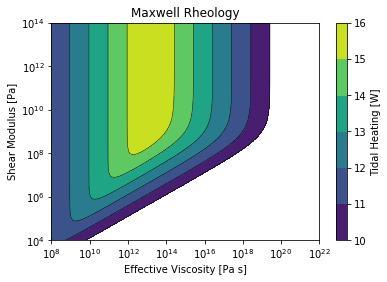

In [7]:
# Pull out Tidal Heating and plot
tidal_heating = io.mantle.tidal_heating
contour_plot(tidal_heating, 'maxwell')

Warning from file 'u:\joe\research\software\tidalpy\TidalPy\rheology\compliance_models.py', line 122:
divide by zero encountered in power

Warning from file 'u:\joe\research\software\tidalpy\TidalPy\tides\love_1d.py', line 67:
invalid value encountered in multiply



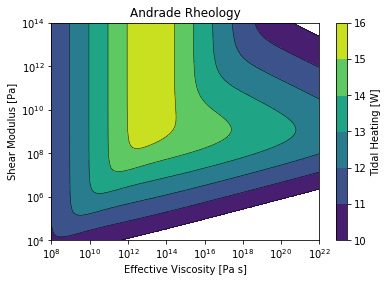

In [8]:
# Maxwell is the default rheology if none is provided in the planet's configuration
# But, we can quickly change the rheology without having to reload everything (or make a new config file)...
io.config['layers']['Mantle']['rheology']['compliance_model'] = 'andrade'
io.reinit()
tidal_heating = io.mantle.tidal_heating
contour_plot(tidal_heating, 'andrade')

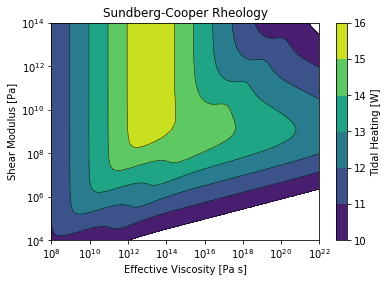

In [9]:
# If rheology information has already been loaded into the layer (as we just did in the last cell) then
#     we can change the rheology model without affecting any other configurations...
io.config['layers']['Mantle']['rheology']['compliance_model'] = 'sundberg'
io.reinit()
tidal_heating = io.mantle.tidal_heating
contour_plot(tidal_heating, 'Sundberg-Cooper')